In [1]:
pip install jcopml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Memanggil Library
import pandas as pd
import numpy as np
import joblib


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [4]:
cuaca = pd.read_csv("data/Cuaca-2018-2023-3.csv")
cuaca

,Suhu,Kelembaban,Curah Hujan,Sinar Matahari,Kondisi
0,25.88,86.97,14.22,3.27,0
1,25.99,87.46,15.35,5.49,0
2,26.39,86.16,7.76,6.09,1
3,27.02,85.50,3.86,6.60,1
4,26.34,82.77,0.41,7.19,1
...,...,...,...,...,...
56,26.47,83.87,3.85,5.73,1
57,25.56,90.06,10.26,3.30,0
58,25.81,90.77,12.20,2.92,0
59,26.18,89.39,14.32,3.79,0


In [5]:
# Split data
x = cuaca.drop(columns="Kondisi")
y = cuaca.Kondisi

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48, 4), (13, 4), (48,), (13,))

In [6]:
# Preprocessing
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["Suhu", "Kelembaban", "Curah Hujan", "Sinar Matahari"]),
])

In [7]:
# Inisialisasi
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", GaussianNB())
])

In [8]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Suhu', 'Kelembaban',
                                                   'Curah Hujan',
                                                   'Sinar Matahari'])])),
                ('algo', GaussianNB())])

In [9]:
pipeline.score(x_train, y_train)

0.9375

In [10]:
pipeline.score(x_test, y_test)

0.9230769230769231

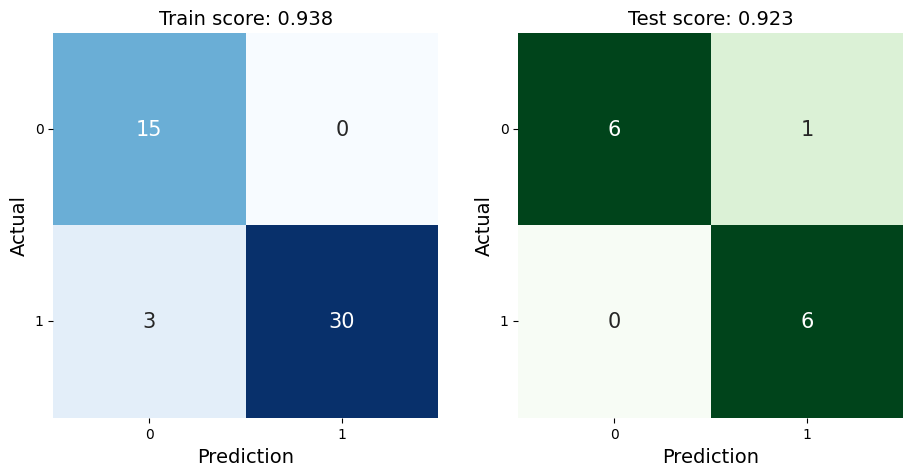

In [11]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train, y_train, x_test, y_test, pipeline)

In [12]:
x_pred = pd.read_csv("data/testing.csv")
x_pred

,Suhu,Kelembaban,Curah Hujan,Sinar Matahari
0,27,88,10.55,5.69


In [13]:
pipeline.predict(x_pred)

array([0])

In [14]:
x_pred["Kondisi"] = pipeline.predict(x_pred)
print(x_pred)

   Suhu  Kelembaban  Curah Hujan  Sinar Matahari  Kondisi
0    27          88        10.55            5.69        0


In [16]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))

Akurasi model: 92.31%


In [15]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.86      1.00      0.92         6

    accuracy                           0.92        13
   macro avg       0.93      0.93      0.92        13
weighted avg       0.93      0.92      0.92        13



In [31]:
data_array = np.array([[25, 80, 15, 0]])
data_pred = pd.DataFrame(data_array, columns=["Suhu", "Kelembaban", "Curah Hujan", "Sinar Matahari"])

In [33]:
# Melakukan prediksi
prediction = pipeline.predict(data_pred)
data_pred["Kondisi"] = prediction
print(data_pred)

   Suhu  Kelembaban  Curah Hujan  Sinar Matahari  Kondisi
0    25          80           15               0        0


In [21]:
joblib.dump(pipeline, 'model.pkl')

['model.pkl']